In [17]:
import numpy as np
import matplotlib.pyplot as plt
from rules_new import RuleNew, initial_population, print_rule, make_rule_good, good_movement
from fitness_new import *
from genetic_new import genetic_algorithm
from utility_func import *
import time

[[35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35], [35, 62, 46, 46, 35, 46, 46, 46, 35, 46, 46, 46, 46, 46, 35], [35, 35, 35, 46, 35, 46, 35, 46, 35, 46, 35, 35, 35, 46, 35], [35, 46, 46, 46, 35, 46, 35, 46, 46, 46, 35, 46, 46, 46, 35], [35, 46, 35, 35, 35, 46, 35, 35, 35, 35, 35, 35, 35, 46, 35], [35, 46, 46, 46, 46, 46, 46, 46, 35, 46, 46, 46, 35, 46, 35], [35, 35, 35, 35, 35, 35, 35, 46, 35, 46, 35, 46, 35, 46, 35], [35, 46, 46, 46, 46, 46, 46, 46, 35, 46, 35, 46, 35, 46, 35], [35, 46, 35, 35, 35, 35, 35, 35, 35, 46, 35, 46, 35, 35, 35], [35, 46, 35, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 35], [35, 46, 35, 46, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35], [35, 46, 46, 46, 35, 46, 46, 46, 46, 46, 46, 46, 46, 35, 35], [35, 35, 35, 46, 35, 46, 35, 35, 35, 35, 35, 35, 46, 35, 35], [35, 46, 46, 46, 46, 46, 35, 46, 46, 46, 46, 46, 46, 35, 35], [35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 64, 35, 35]]


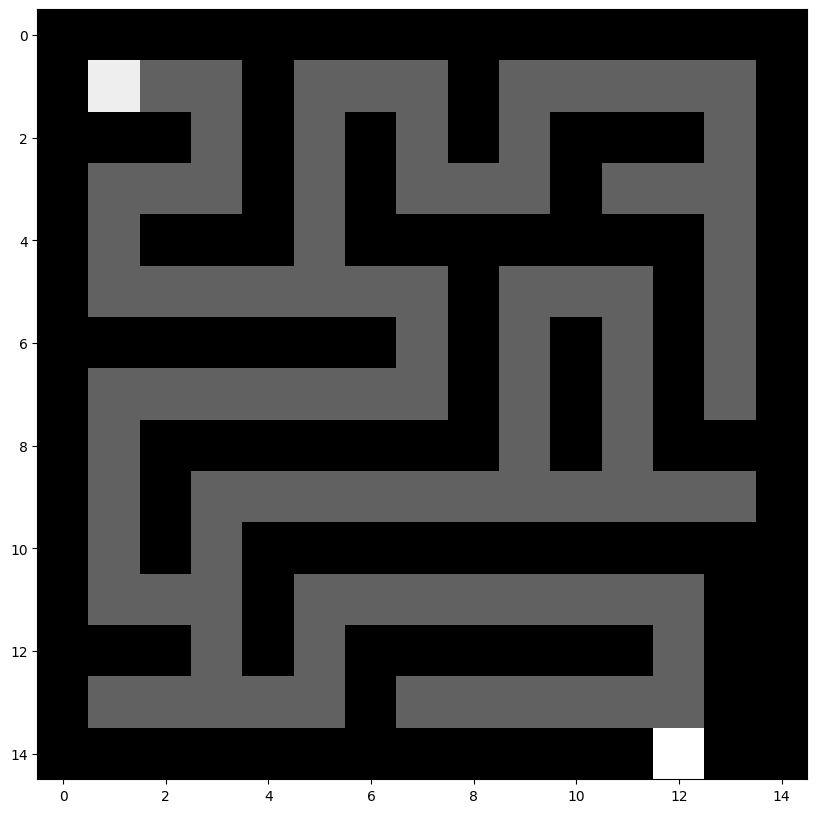

In [24]:
maze = [
    [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
    [-1, 62,  0,  0, -1,  0,  0,  0, -1,  0,  0,  0,  0,  0, -1],
    [-1, -1, -1,  0, -1,  0, -1,  0, -1,  0, -1, -1, -1,  0, -1],
    [-1,  0,  0,  0, -1,  0, -1,  0,  0,  0, -1,  0,  0,  0, -1],
    [-1,  0, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1,  0, -1],
    [-1,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0, -1,  0, -1],
    [-1, -1, -1, -1, -1, -1, -1,  0, -1,  0, -1,  0, -1,  0, -1],
    [-1,  0,  0,  0,  0,  0,  0,  0, -1,  0, -1,  0, -1,  0, -1],
    [-1,  0, -1, -1, -1, -1, -1, -1, -1,  0, -1,  0, -1, -1, -1],
    [-1,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1],
    [-1,  0, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
    [-1,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1],
    [-1, -1, -1,  0, -1,  0, -1, -1, -1, -1, -1, -1,  0, -1, -1],
    [-1,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0, -1, -1],
    [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 64, -1, -1],
]
for i in range(len(maze)):
    for j in range(len(maze[0])):
        if maze[i][j]==0:
            maze[i][j]=46
        if maze[i][j]==-1:
            maze[i][j]=35
print(maze)
maze=np.array(maze)
def env_visualize(obs):
    fig, ax = plt.subplots()
    im = ax.imshow(obs, cmap='gray')

    #adjust the size of the figure
    fig.set_size_inches(30,10)


env_visualize(maze)

In [25]:
goal = search_environment_goal_position(maze)
goal

(1, 1)

In [26]:
f=lambda x,y: x*y
g=lambda x:f(x=2)

In [27]:
type(g)

function

In [28]:
def walkable(maze, tile):
    x, y=tile
    return maze[x,y]!=35 and maze[x,y]!=32

In [29]:
def distance(goal, tile):
    return abs(goal[0] - tile[0]) + abs(goal[1] - tile[1])

def fitness_tile(maze, goal, movement, tile):
    dx, dy = int_to_coord[movement]
    new_tile = (tile[0] + dx, tile[1] + dy)
    if not walkable(maze, new_tile):
        return -1
    # return the distance to the goal minus the previus distance to the goal
    return distance(goal, new_tile) - distance(goal, tile)


In [30]:
movement_score_lab=lambda goal , movement, position: fitness_tile(maze, goal, movement, position)


0 0
[0, 1]
0 1
[-1, 0]
0 2
[1, 1]
0 3
[-1, -1]
0 4
[0, 1]
0 5
[0, 1]
0 6
[-1, 0]
0 7
[0, -1]
0 8
[1, 1]
0 9
[1, -1]
0 10
[0, -1]
0 11
[-1, -1]
0 12
[1, -1]
0 13
[-1, -1]
0 14
[1, 0]
1 0
[1, 1]
1 1
[-1, -1]
1 2
[-1, -1]
1 3
[-1, -1]
1 4
[-1, -1]
1 5
[1, 1]
1 6
[-1, 0]
1 7
[0, -1]
1 8
[0, -1]
1 9
[-1, 0]
1 10
[0, 1]
1 11
[0, -1]
1 12
[0, -1]
1 13
[1, 0]
1 14
[-1, 0]
2 0
[0, -1]
2 1
[0, 1]
2 2
[1, 0]
2 3
[-1, 0]
2 4
[-1, -1]
2 5
[-1, 0]
2 6
[1, 1]
2 7
[0, 1]
2 8
[-1, -1]
2 9
[-1, 0]
2 10
[1, 1]
2 11
[1, 1]
2 12
[1, 1]
2 13
[-1, -1]
2 14
[1, 1]
3 0
[1, 0]
3 1
[0, 1]
3 2
[0, 1]
3 3
[1, -1]
3 4
[-1, 0]
3 5
[0, 1]
3 6
[-1, 1]
3 7
[0, 1]
3 8
[1, 0]
3 9
[1, -1]
3 10
[-1, 1]
3 11
[-1, -1]
3 12
[0, 1]
3 13
[1, -1]
3 14
[1, 1]
4 0
[-1, 1]
4 1
[1, 1]
4 2
[0, 1]
4 3
[1, 1]
4 4
[-1, 1]
4 5
[1, 0]
4 6
[-1, 1]
4 7
[0, -1]
4 8
[1, 0]
4 9
[-1, 0]
4 10
[1, 0]
4 11
[-1, -1]
4 12
[0, -1]
4 13
[0, -1]
4 14
[1, 1]
5 0
[-1, 1]
5 1
[1, -1]
5 2
[0, -1]
5 3
[-1, 0]
5 4
[-1, 1]
5 5
[0, 1]
5 6
[-1, 1]
5 7
[1, 1]
5 

-131